# Explore here

In [14]:
"""import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definir rutas
data_dir = "/workspaces/Proyecto-Deep-Learning-Jorge3127/data/raw"  # Asegúrate de colocar la ruta correcta
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test1")

# Parámetros
img_size = (224, 224)
batch_size = 64  # Aumentamos el tamaño del batch para mejorar eficiencia
epochs = 1  # Reducimos el número de épocas

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar datos de entrenamiento, validación y prueba
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
)

# Verifica las clases que están siendo detectadas
print(f"Clases detectadas: {train_data.class_indices}")

# Cargar modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar capas convolucionales

# Agregar capas personalizadas
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularización para evitar overfitting
x = Dense(1, activation='sigmoid')(x)  # Salida con una neurona y activación sigmoid para clasificación binaria

# Crear modelo final
model = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # Usamos binary_crossentropy para clasificación binaria
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
model.fit(
    train_data, validation_data=val_data, epochs=epochs, callbacks=[checkpoint, early_stopping]
)

# Evaluar en test
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")

# Guardar el modelo final
model.save("cats_vs_dogs_model.h5")"""


'import os\nimport tensorflow as tf\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.applications import VGG16\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Flatten, Dense, Dropout\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping\n\n# Definir rutas\ndata_dir = "/workspaces/Proyecto-Deep-Learning-Jorge3127/data/raw"  # Asegúrate de colocar la ruta correcta\ntrain_dir = os.path.join(data_dir, "train")\ntest_dir = os.path.join(data_dir, "test1")\n\n# Parámetros\nimg_size = (224, 224)\nbatch_size = 64  # Aumentamos el tamaño del batch para mejorar eficiencia\nepochs = 1  # Reducimos el número de épocas\n\n# Data Augmentation\ntrain_datagen = ImageDataGenerator(\n    rescale=1./255,\n    validation_split=0.2,\n    horizontal_flip=True,\n    rotation_range=20,\n    zoom_range=0.2\n)\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\n# Cargar dato

In [15]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [16]:
train_path = '/workspaces/Proyecto-Deep-Learning-Jorge3127/data/raw/train/'  # Ruta general para train
test_path = '/workspaces/Proyecto-Deep-Learning-Jorge3127/data/raw/test1'  # Ruta general para test

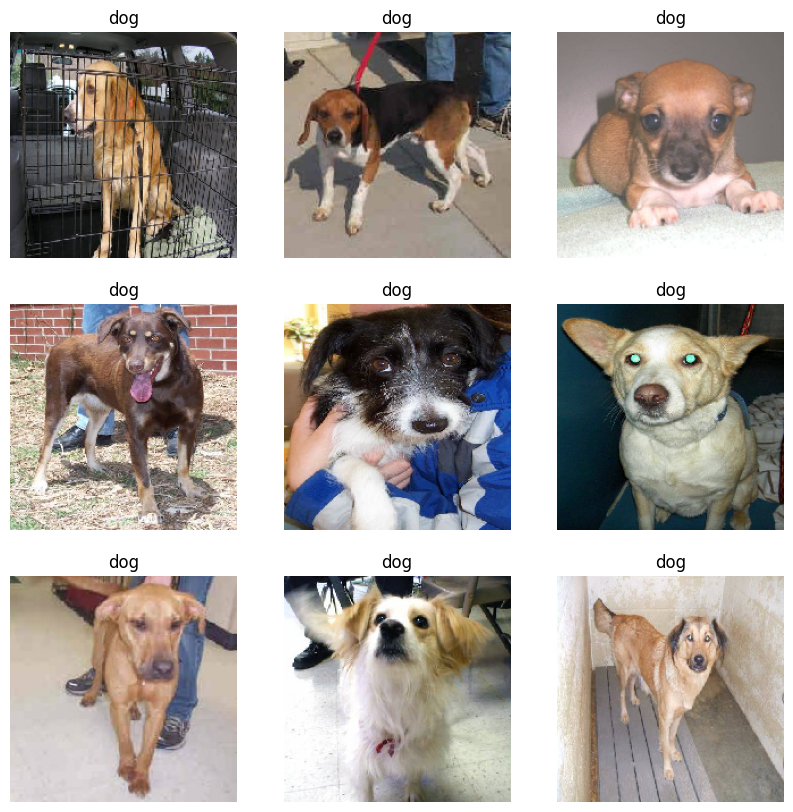

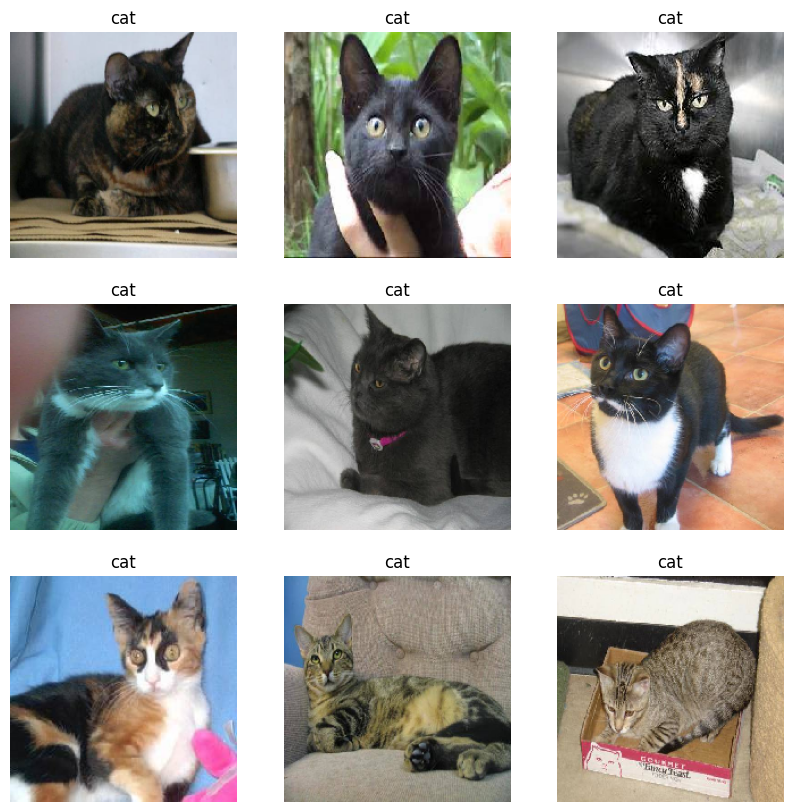

In [17]:
import os
import shutil
import matplotlib.pyplot as plt  # Para las gráficas
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator  # Importar load_img

def graficar_muestra(path_directorio, categoria='dog', cantidad_ejemplos=9):
    plt.figure(figsize=(10, 10))

    imagenes = []
    etiquetas = []

    etiqueta = 1
    if categoria == "cat":
        etiqueta = 0

    cantidad_procesada = 0
    i = 0
    for imagen in os.listdir(path_directorio):
        if imagen.startswith(categoria):
            imagen_path = os.path.join(path_directorio, imagen)

            imagenes.append(load_img(imagen_path, target_size=(200, 200)))  # Usar load_img
            etiquetas.append(etiqueta)

            if cantidad_procesada == cantidad_ejemplos:
                break  # sale del for

            cantidad_procesada += 1

            plt.subplot(3, 3, i + 1)
            plt.imshow(imagenes[i])
            plt.title(categoria)
            plt.axis('off')

            i += 1
    plt.show()

# Visualizar las muestras de perros y gatos
train_path = '/workspaces/Proyecto-Deep-Learning-Jorge3127/data/raw/train/'
graficar_muestra(train_path + 'dog', 'dog', 9)
graficar_muestra(train_path + 'cat', 'cat', 9)


In [18]:
import shutil
import os

def organizar_imagenes(path_directorio):
    directorio_perros = os.path.join(path_directorio, 'dog')
    directorio_gatos = os.path.join(path_directorio, 'cat')

    os.makedirs(directorio_perros, exist_ok=True)
    os.makedirs(directorio_gatos, exist_ok=True)

    for imagen in os.listdir(path_directorio):
        if os.path.isfile(os.path.join(path_directorio, imagen)):
            if imagen.startswith('cat'):
                shutil.move(os.path.join(path_directorio, imagen), os.path.join(directorio_gatos, imagen))
            elif imagen.startswith('dog'):
                shutil.move(os.path.join(path_directorio, imagen), os.path.join(directorio_perros, imagen))

def organizar_imagenes_test(path_directorio):
    directorio_clase = os.path.join(path_directorio, 'test')
    os.makedirs(directorio_clase, exist_ok=True)

    for imagen in os.listdir(path_directorio):
        if os.path.isfile(os.path.join(path_directorio, imagen)):
            shutil.move(os.path.join(path_directorio, imagen), os.path.join(directorio_clase, imagen))


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def carga_preprocesa_imagenes(path_directorio, img_size=(100, 100), batch_size=32, grayscale=False, data_extra=False):
    if data_extra:
        datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
        )
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    color_mode = 'grayscale' if grayscale else 'rgb'

    # Cargar imágenes desde la carpeta
    generator = datagen.flow_from_directory(
        directory=path_directorio,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        color_mode=color_mode
    )

    return generator


In [20]:
# Mover las imágenes de entrenamiento a las subcarpetas 'dog' y 'cat'
organizar_imagenes(train_path)

# Mover las imágenes de test a la subcarpeta 'test'
organizar_imagenes_test(test_path)

# Parámetros
img_size = (100, 100)  # Tamaño de las imágenes
batch_size = 32        # Tamaño del batch
grayscale = False      # No convertir a escala de grises
epochs = 1

# Cargar los generadores de imágenes para entrenamiento y prueba
train_generator = carga_preprocesa_imagenes(train_path, img_size=img_size, batch_size=batch_size)
test_generator = carga_preprocesa_imagenes(test_path, img_size=img_size, batch_size=batch_size)


Found 24990 images belonging to 2 classes.
Found 12337 images belonging to 1 classes.


In [21]:
# Cargar VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
base_model.trainable = False  # Congelar pesos para entrenar solo capas personalizadas

In [22]:
# Construcción del modelo optimizado para CPU
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Reducido de 512 a 256
x = Dropout(0.4)(x)  # Dropout para evitar sobreajuste
x = Dense(1, activation='sigmoid')(x)  # Salida binaria

model = Model(inputs=base_model.input, outputs=x)

In [23]:
# Compilación del modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Entrenamiento rápido (solo 1 época)
history = model.fit(
    train_generator,
    epochs=epochs
)

# Acceder a la precisión desde el objeto 'history'
accuracy = history.history['accuracy']


781/781 ━━━━━━━━━━━━━━━━━━━━ 1073s 1s/step - accuracy: 0.8682 - loss: 0.3006


In [29]:
import os
from tensorflow.keras.models import Sequential

# Crear un modelo simple
model = Sequential()
# Añadir tus capas aquí...
# model.add(...)

# Crear la carpeta 'models' si no existe
if not os.path.exists("models"):
    os.makedirs("models")

# Guardar el modelo en la carpeta 'models' usando el formato recomendado
model.save("models/best_model.keras")


/home/vscode/.local/lib/python3.10/site-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)
